In [3]:
#!/usr/bin/python3 (3.8.10 x64)
import numpy as np
import pygad
import os
import mazes

Create a function that reads the 2D representation of a maze and returns the shortest path found by a genetic algorithm.

In [4]:
# Convert mazes into 2D array of chars
def get_maze(maze):
    res = []
    for i in range(len(maze)):
        row = list(list(maze[i])[0])
        res.append(row)
        
    return np.array(res)

In [5]:
# Convert mazes
maze1 = get_maze(mazes.maze1)
maze2 = get_maze(mazes.maze2)
maze3 = get_maze(mazes.maze3)
maze4 = get_maze(mazes.maze4)
maze5 = get_maze(mazes.maze5)
maze6 = get_maze(mazes.maze6)
maze7 = get_maze(mazes.maze7)
maze3_T = get_maze(mazes.maze3_T) 
maze4_T = get_maze(mazes.maze4_T) 
maze5_T = get_maze(mazes.maze5_T) 
maze7_T = get_maze(mazes.maze7_T) 

In [39]:
# Return a tuple containing indices of start
def find_start(maze):
    '''
        Return an array containing indices of start
    '''
    maze = np.array(maze)
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i,j] == "S":
                return [i,j]

In [40]:
# Return a tuple containing indices of end
def find_end(maze):
    '''
    Return an array containing indices of end
    '''
    maze = np.array(maze)
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i,j] == "E":
                return [i,j]

Solution will be encoded as follows:
* It will be a vector of values (np array)
* Each value will span from 0 to 3
* Each value corresponds to a direction 
* * 0 - up
* * 1 - down
* * 2 - left
* * 3 - right

Maze: `h x w` matrix, possible values of maze[i,j]:
* `#` - wall
* `.` - valid field
* `S` - starting field
* `E` - ending field

Maze[i,j] gives:
*   (0) up = Maze[i-1, j]
*   (1) down = Maze[i+1, j]
*   (2) left = Maze[i, j-1]
*   (3) right = Maze[i, j+1]

In [166]:
def fitness(solution, solution_index):
    '''
        Takes in a maze and a solution and solution_index
        Returns a scalar score
    '''
    score = 0
    maze = maze1
    
    start = find_start(maze)
    end = find_end(maze)
    
    position = start
    for move in solution:
        
        # Determine direction
        if move == 0:
            position[0] -= 1
        elif move == 1:
            position[0] += 1
        elif move == 2:
            position[1] -= 1
        elif move == 3:
            position[1] += 1
            
        i,j = position[0], position[1]
        
        if i < 0 or j < 0 or i > maze.shape[0]-1 or j > maze.shape[1]-1:
            return -1000
        if maze[i,j] == "#":
            score -= 100
        elif maze[i,j] == ".":
            score -= 10
        elif maze[i,j] == "S":
            score -= 100
        else:
            score += 1000
    
    return score

In [188]:
# Choose which maze to solve
maze = maze3

In [196]:
desired_output = 97

num_generations = 200
num_parents_mating = 4

sol_per_pop = 20
num_genes = maze.shape[0] * maze.shape[1]

init_range_low = 0
init_range_high = 3

parent_selection_type = "tournament"
keep_parents = 4

crossover_type = "single_point"
crossover_probability = .6

mutation_type = "random"
mutation_percent_genes = 10

In [197]:
def callback_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])

In [198]:
ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        gene_type=int,
                        init_range_low=init_range_low,
                        init_range_high=init_range_high,
                        keep_elitism=1,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        crossover_probability=crossover_probability,
                        mutation_type=mutation_type,
                        #save_best_solutions=True,
                        gene_space=[0,1,2,3],
                        mutation_percent_genes=mutation_percent_genes,
                        on_generation=callback_gen
                        )

Generation :  1
Fitness of the best solution : -1000
Generation :  2
Fitness of the best solution : -1000
Generation :  3
Fitness of the best solution : -1000
Generation :  4
Fitness of the best solution : -1000
Generation :  5
Fitness of the best solution : -1000
Generation :  6
Fitness of the best solution : -1000
Generation :  7
Fitness of the best solution : -1000
Generation :  8
Fitness of the best solution : -1000
Generation :  9
Fitness of the best solution : -1000
Generation :  10
Fitness of the best solution : -1000
Generation :  11
Fitness of the best solution : -1000
Generation :  12
Fitness of the best solution : -1000
Generation :  13
Fitness of the best solution : -1000
Generation :  14
Fitness of the best solution : -1000
Generation :  15
Fitness of the best solution : -1000
Generation :  16
Fitness of the best solution : -1000
Generation :  17
Fitness of the best solution : -1000
Generation :  18
Fitness of the best solution : -1000
Generation :  19
Fitness of the best 

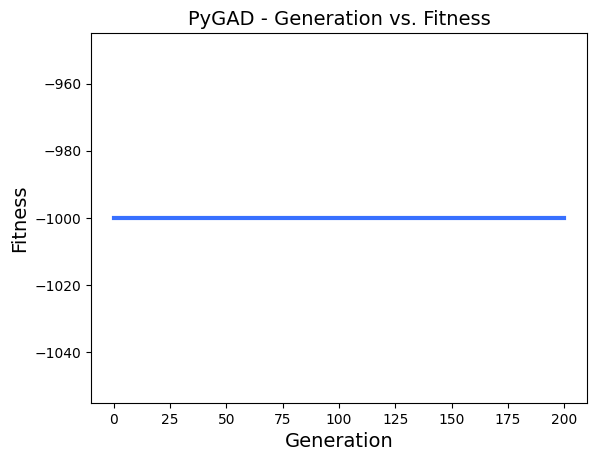

Parameters of the best solution : [0 0 0 0 3 1 1 0 0 2 1 3 3 1 2 1 1 2 3 2 2 1 2 3 0 2 1 0 3 1 3 3 0 3 3 0 0
 1 2 0 3 0 3 3 0 2 1 2 3 2 3 3 0 2 2 1 0 1 3 2 2 0 3 3 1 1 2 3 3 2 1 2 3 1
 2 2 0 3 2 0 2 1 0 2 1 0 1 3 1 2 2 3 3 1 0 3 3 3 2 1]
Fitness value of the best solution = -1000


In [199]:
ga_instance.run()
ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


#prediction = np.sum(np.array(ins)*solution)
#print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

In [200]:
def visualize(maze, solution):
    pos = find_start(maze)
    for step in solution:
        if step == 0:
            pos[0] -= 1
        elif step == 1:
            pos[0] += 1
        elif step == 2:
            pos[1] -= 1
        else:
            pos[1] += 1
        maze[pos[0], pos[1]] = "O" 
    return maze    


In [201]:
print(visualize(maze, solution))


[['#' 'O' 'O' 'O' 'O' 'O' '#' '#' '#' '#']
 ['O' 'O' 'O' 'O' 'O' 'O' '.' '.' '.' 'O']
 ['O' 'O' 'O' '#' 'O' '#' '#' '#' '.' 'O']
 ['#' '.' '.' '.' '.' '.' '.' '.' '.' '#']
 ['#' '.' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' '.' '.' '.' '.' '.' '.' '.' '.' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#' '.' '#']
 ['#' 'O' 'O' 'O' 'O' 'O' 'O' '.' '.' '#']
 ['#' 'O' 'O' 'O' 'O' 'O' 'O' '#' '#' '#']
 ['#' 'O' 'O' 'O' 'O' 'O' 'O' '#' '#' '#']]
